In [1]:
import numpy as np    
import uproot3
import matplotlib.pyplot as plt

In [2]:
infile = '/Users/yw18581/Downloads/largedrum_1L_dense_MedianCut_3cmVoxel_withoutCut.discriminator.root'

In [3]:
fu = uproot3.open(infile)
histogram = fu['histMedianMetric'].numpy()[0]
bins_x, bins_y, bins_z = fu['histMedianMetric;1'].numpy()[1][0]

In [4]:
sel_x = np.where(np.logical_and(bins_x>=-440, bins_x<=440))[0]
sel_y = np.where(np.logical_and(bins_y>=-300, bins_y<=300))[0]
sel_z = np.where(np.logical_and(bins_z>=-300, bins_z<=300))[0]
sel_hist = np.meshgrid(sel_x,sel_y,sel_z)

In [5]:
selected_histogram = np.copy(histogram[tuple(sel_hist)])

In [6]:
histogram = selected_histogram

In [7]:
shape_x, shape_y, shape_z = histogram.shape

In [24]:
def cube(x, y, z):
    if x in [0,shape_x-1] or y in [0, shape_y-1] or z in [0, shape_z-1]:
        return None
    mgrid = np.mgrid[x-1:x+2:1, y-1:y+2:1, z-1:z+2:1]
    x, y, z = map(np.ravel, mgrid)
    return x, y, z

#### Voxel containing Bitumen

In [25]:
thresh=11.265
stats_bt_bt = dict()
xx, yy, zz = np.where(histogram<thresh)
for x, y, z in zip(xx, yy, zz):
    cubes_coord = cube(x, y, z)
    if cubes_coord is None:
        continue
    xs, ys, zs = cubes_coord
    triplets = np.array([(i, j, k) for (i, j, k) in zip(xs, ys, zs)])
    cube_around_pt = np.array([histogram[cx, cy, cz] for (cx, cy, cz) in triplets])
    filtered_cube = cube_around_pt[cube_around_pt < thresh]
    below_threshold_count = (len(filtered_cube) -1) if (len(filtered_cube) > 0) else 0.
    stats_bt_bt[(x, y, z)] = below_threshold_count

In [26]:
thresh=11.265
stats_bt_air = dict()
xx, yy, zz = np.where(histogram<thresh)
for x, y, z in zip(xx, yy, zz):
    cubes_coord = cube(x, y, z)
    if cubes_coord is None:
        continue
    xs, ys, zs = cubes_coord
    triplets = np.array([(i, j, k) for (i, j, k) in zip(xs, ys, zs)])
    cube_around_pt = np.array([histogram[cx, cy, cz] for (cx, cy, cz) in triplets])
    filtered_cube = cube_around_pt[cube_around_pt >= thresh]
    above_threshold_count = len(filtered_cube)
    stats_bt_air[(x, y, z)] = above_threshold_count

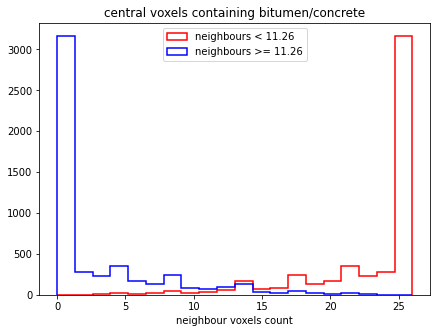

In [42]:
plt.figure(figsize=(7,5))
#bb =np.arange(-0.5, 27.5, 1)
plot_kwds = {'density': False, 'linewidth':"1.5", 'histtype': u'step', "bins":20}
plt.hist(stats_bt_bt.values(), label='neighbours < 11.26', edgecolor='red', **plot_kwds)
plt.hist(stats_bt_air.values(), label='neighbours >= 11.26', edgecolor='blue', **plot_kwds)
plt.title("central voxels containing bitumen/concrete")
plt.xlabel('neighbour voxels count')
#plt.xticks(np.arange(-0.5,27.5,3))
plt.legend(loc='upper center')
#plt.yscale('log')
plt.savefig("neighbour_voxels_ct.png") 
plt.show()

In [28]:
min(stats_bt_air.values()), max(stats_bt_air.values())

(0, 26)

##### Voxels containing Hydrogen

In [29]:
thresh=11.265
stats_air_air = dict()
xx, yy, zz = np.where(histogram>=thresh)
for x, y, z in zip(xx, yy, zz):
    cubes_coord = cube(x, y, z)
    if cubes_coord is None:
        continue
    xs, ys, zs = cubes_coord
    #xs, ys, zs = map(np.ravel, cubes_coord)
    triplets = np.array([(i, j, k) for (i, j, k) in zip(xs, ys, zs)])
    #cx, cy, cz = cubes_coord
    cube_around_pt = np.array([histogram[cx, cy, cz] for (cx, cy, cz) in triplets])
    filtered_cube = cube_around_pt[cube_around_pt >= thresh]
    above_threshold_count = (len(filtered_cube) -1) if (len(filtered_cube) > 0) else 0.
    stats_air_air[(x, y, z)] = above_threshold_count


In [30]:
thresh=11.265
stats_air_bt = dict()
xx, yy, zz = np.where(histogram>=thresh)
for x, y, z in zip(xx, yy, zz):
    cubes_coord = cube(x, y, z)
    if cubes_coord is None:
        continue
    xs, ys, zs = cubes_coord
    #xs, ys, zs = map(np.ravel, cubes_coord)
    triplets = np.array([(i, j, k) for (i, j, k) in zip(xs, ys, zs)])
    #cx, cy, cz = cubes_coord
    cube_around_pt = np.array([histogram[cx, cy, cz] for (cx, cy, cz) in triplets])
    filtered_cube = cube_around_pt[cube_around_pt < thresh]
    below_threshold_count = len(filtered_cube)
    stats_air_bt[(x, y, z)] = below_threshold_count


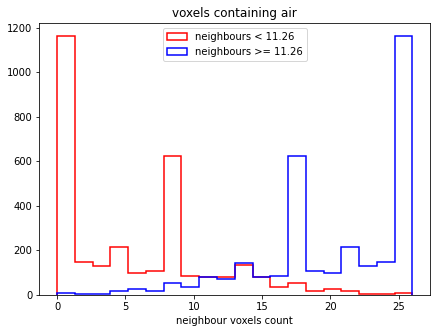

In [43]:
plt.figure(figsize=(7,5))
#bb =np.arange(-0.5, 27.5, 1)
plot_kwds = {'density': False, 'linewidth':"1.5", 'histtype': u'step', "bins":20}
plt.hist(stats_air_bt.values(), label='neighbours < 11.26', edgecolor='red', **plot_kwds)
plt.hist(stats_air_air.values(), label='neighbours >= 11.26', edgecolor='blue', **plot_kwds)
plt.title("voxels containing air")
plt.xlabel('neighbour voxels count')
plt.legend(loc='upper center')
#plt.yscale('log')
plt.savefig("neighbour_voxels_air.png") 
plt.show()

#### Replicate what mohammed did

In [41]:
thresh

11.265

In [63]:
sel_x

array([19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47])

In [64]:
sel_y

array([24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40,
       41, 42])

In [44]:
sel_z

array([ 7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
       24, 25, 26])

In [81]:
counts = np.zeros(100000)
counts_per_cube = list()
for i in np.arange(19,48):
    for j in np.arange(24,43):
        for z in np.arange(7, 27):
            count = 0
            if histogram[i,j,k]>=thresh:
                for a in range(-1,2):
                    for b in range(-1,2):
                        for c in range(-1,2):
                            if histogram[i+a,j+b,k+c]>= thresh:
                                count+=1
                counts[i]=count
            counts_per_cube.append(counts[i])
counts_per_cube_aa = np.asarray(counts_per_cube)

In [86]:
counts = np.zeros(100000)
counts_per_cube = list()
for i in np.arange(19,48):
    for j in np.arange(24,43):
        for z in np.arange(7, 27):
            count = 0
            if histogram[i,j,k]>=thresh:
                for a in range(-1,2):
                    for b in range(-1,2):
                        for c in range(-1,2):
                            if histogram[i+a,j+b,k+c]< thresh:
                                count+=1
                counts[i]=count
            counts_per_cube.append(counts[i])
counts_per_cube_ab = np.asarray(counts_per_cube)


In [87]:
np.where(counts>0)[0].shape

(13,)

In [88]:
len(counts_per_cube)

11020

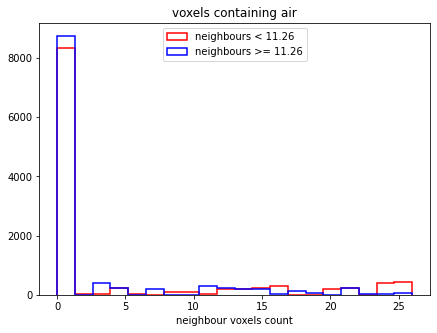

In [89]:
plt.figure(figsize=(7,5))
plt.hist(counts_per_cube_ab, label='neighbours < 11.26', edgecolor='red', **plot_kwds)
plt.hist(counts_per_cube_aa, label='neighbours >= 11.26', edgecolor='blue', **plot_kwds)
plt.title("voxels containing air")
plt.xlabel('neighbour voxels count')
#plt.xticks(np.arange(-0.5,27.5,3))
plt.legend(loc='upper center')
#plt.yscale('log')
plt.show()

In [23]:
xx, yy, zz = np.mgrid[1:shape_x-1,1:shape_y-1,1: shape_z-1]
xx, yy, zz = xx.ravel(), yy.ravel(), zz.ravel()
counts_per_cube = []
for (i, j, k) in zip(xx, yy, zz):
    count = 0
    if histogram[i,j,k]<thresh:
        for a in range(-1,2):
            for b in range(-1,2):
                for c in range(-1,2):
                    if histogram[i+a,j+b,k+c]< thresh:
                        count+=1
        counts_per_cube.append(count)
counts_per_cube_bb = np.asarray(counts_per_cube)

In [24]:
xx, yy, zz = np.mgrid[1:shape_x-1,1:shape_y-1,1: shape_z-1]
xx, yy, zz = xx.ravel(), yy.ravel(), zz.ravel()
counts_per_cube = []
for (i, j, k) in zip(xx, yy, zz):
    count = 0
    if histogram[i,j,k]<thresh:
        for a in range(-1,2):
            for b in range(-1,2):
                for c in range(-1,2):
                    if histogram[i+a,j+b,k+c]>= thresh:
                        count+=1
        counts_per_cube.append(count)
counts_per_cube_ba = np.asarray(counts_per_cube)

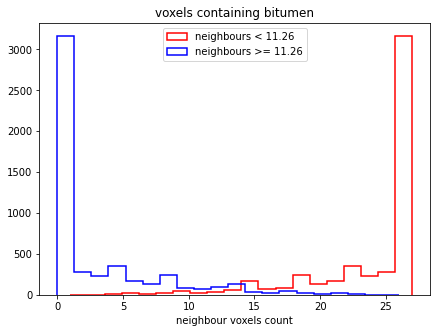

In [26]:
plt.figure(figsize=(7,5))
plot_kwds['bins'] = 20
plt.hist(counts_per_cube_bb, label='neighbours < 11.26', edgecolor='red', **plot_kwds)
plt.hist(counts_per_cube_ba, label='neighbours >= 11.26', edgecolor='blue', **plot_kwds)
plt.title("voxels containing bitumen")
plt.xlabel('neighbour voxels count')
#plt.xticks(np.arange(-0.5,27.5,3))
plt.legend(loc='upper center')
#plt.yscale('log')
plt.show()